<a href="https://colab.research.google.com/github/qqto2008/capstone/blob/master/feature_extraction_of_NIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Dataset access

## 1.1 Get dataset

IMPORTANT! This dataset is Labelled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification (OCT-CXR) , which is "chest_xray.zip". Please place the "chest_xray.zip" file in the same folder of the .ipynb file.

OR the dataset can be loaded in Google Colab by the following code.

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file   
id='1N6ji4_wgbsv-VyLI7xGmmdBTFypqvmWW'
downloaded = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
downloaded.GetContentFile('NIH.zip')

## 1.2 Unzip the dataset

In [0]:
# unzip the data

import zipfile

myzip = zipfile.ZipFile('NIH.zip')
myzip.extractall( )



In [0]:
#myzip.infolist()

# 2.Data preprocess

In [0]:
import matplotlib.pyplot as plt

import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

In [0]:
labels = ['Raw_images', 'normal']
img_size = 512

def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [0]:
data = get_training_data('./')
#val = get_training_data('./chest_xray/val')
print(len(data))

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

5732


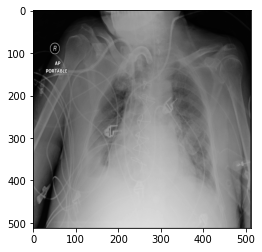

In [0]:
plt.imshow(data[5][0], cmap='gray')

# 3.Feature extraction

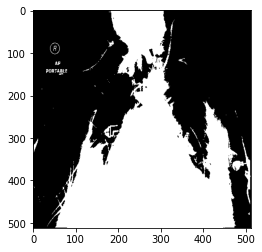

In [0]:
import cv2
import numpy as np

import matplotlib.pylab as plt

train_images = []
for i in range(len(data)):
  for j in range(2):

     img = data[i][j]
# global thresholding
     ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
     images = [th1]
     train_images.append(images)
     
train_images = np.array(train_images).reshape(len(data), 2)  

#plt.imshow(train_images[2][0], cmap='gray')
plt.imshow(train_images[5][0], cmap='gray')
#plt.imshow(images[0],'gray')

In [0]:
train_X = []
train_y = [] 

for feature, label in train_images:
    train_X.append(feature)
    train_y.append(label)
 